In [1]:
import logging

import torch
import torch.nn.functional as F

from lightning.pytorch import Trainer
from lightning.pytorch.tuner import Tuner

from model import FasterRCNN
from data import VOCDataModule
from helper import show_image, show_image_and_bounding_box, show_worst_image_predictions, show_confusion_matrix, get_batch, MyProgressBar
from helper import get_sample, convert_predictions

log = logging.getLogger(__name__)

/home/krm05476/anaconda3/envs/neural-network-course/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Step 1: We need to download an annotated dataset including images and classes and build a data module
data_module = VOCDataModule(data_dir='data/VOC', batch_size=16)

# Step 2: We use a pretrained vision model from torchvision
model = FasterRCNN(num_classes=21)

# Step 3: Train Model
trainer = Trainer(max_epochs=5, callbacks=[MyProgressBar()])
trainer.fit(model, data_module)

Using downloaded and verified file: data/VOC/VOCtrainval_11-May-2012.tar
Extracting data/VOC/VOCtrainval_11-May-2012.tar to data/VOC


/home/krm05476/anaconda3/envs/neural-network-course/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/krm05476/anaconda3/envs/neural-network-course/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA RTX A6000') that has Tensor Cores. To properly utilize them, you should set `torch.set_flo

Using downloaded and verified file: data/VOC/VOCtrainval_11-May-2012.tar
Extracting data/VOC/VOCtrainval_11-May-2012.tar to data/VOC


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type                 | Params | Mode 
------------------------------------------------------------
0 | map_metric | MeanAveragePrecision | 0      | train
1 | model      | FasterRCNN           | 19.0 M | train
------------------------------------------------------------
19.0 M    Trainable params
58.9 K    Non-trainable params
19.0 M    Total params
76.110    Total estimated model params size (MB)


Epoch 0: 100%|██████████████████████████████| 358/358 [00:28<00:00, 12.44it/s, v_num=76, train_loss=1.490]
Epoch 1: 100%|█| 358/358 [00:26<00:00, 13.39it/s, v_num=76, train_loss=1.620, val_map=0.0505, val_map_50=0
Epoch 2: 100%|█| 358/358 [00:26<00:00, 13.44it/s, v_num=76, train_loss=0.584, val_map=0.167, val_map_50=0.
Epoch 3: 100%|█| 358/358 [00:26<00:00, 13.43it/s, v_num=76, train_loss=0.379, val_map=0.178, val_map_50=0.
Epoch 4: 100%|█| 358/358 [00:26<00:00, 13.43it/s, v_num=76, train_loss=0.712, val_map=0.185, val_map_50=0.
Epoch 4: 100%|█| 358/358 [00:45<00:00,  7.89it/s, v_num=76, train_loss=0.712, val_map=0.186, val_map_50=0.

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|█| 358/358 [00:45<00:00,  7.86it/s, v_num=76, train_loss=0.712, val_map=0.186, val_map_50=0.


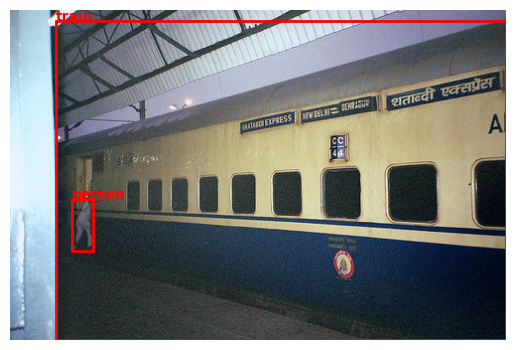

AttributeError: 'VOCDataModule' object has no attribute 'get_idx_to_classx'

In [3]:
# Step 1: Get samples
image, bbox = get_sample(data_module, val=True, idx=1)

# Step 2: Show labels (true bboxes)
show_image_and_bounding_box(image, bbox['annotation']['object'])

# Step 3: Make predictions with our neural network
pred = trainer.model([image])

# Step 4: Show predicted bboxes on image
idx_to_class = data_module.get_idx_to_class()
converted_predictions = convert_predictions(pred, idx_to_class, threshold=0.3)
show_image_and_bounding_box(image, converted_predictions)